Logistic,SVM,KNN,D-Tree,Random-forget,MLP,Gradient-BOOSTING,ADABOOST

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,make_scorer, silhouette_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from joblib import dump

In [2]:
df = pd.read_csv('D:\\project\\Loan_Default\\dataset\\data_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 82 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   loan_amount                         148670 non-null  float64
 1   rate_of_interest                    148670 non-null  float64
 2   Interest_rate_spread                148670 non-null  float64
 3   Upfront_charges                     148670 non-null  float64
 4   term                                148670 non-null  float64
 5   property_value                      148670 non-null  float64
 6   income                              148670 non-null  float64
 7   Credit_Score                        148670 non-null  float64
 8   LTV                                 148670 non-null  float64
 9   Status                              148670 non-null  int64  
 10  dtir1                               148670 non-null  float64
 11  rate_of_interest_missing  

In [5]:
df.head(3)

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,...,age_nan,submission_of_application_not_inst,submission_of_application_to_inst,submission_of_application_nan,Region_North,Region_North-East,Region_central,Region_south,Security_Type_Indriect,Security_Type_direct
0,-0.750000,0.00,0.520086,-1.168642,1.0,-0.702703,-0.8375,0.645,0.761955,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.375000,0.00,0.520086,-1.168642,1.0,-1.021622,-0.1625,0.130,-1.492371,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.458333,0.57,0.548678,0.300207,1.0,0.351351,0.7750,0.835,0.334760,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [6]:
print(df.describe())

         loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
count  148670.000000     148670.000000         148670.000000     1.486700e+05   
mean        0.144241          0.381741              0.567664    -2.116287e-16   
std         0.766289          0.225903              0.069239     1.000003e+00   
min        -1.166667          0.000000              0.000000    -1.168642e+00   
25%        -0.416667          0.343750              0.520086    -1.168642e+00   
50%         0.000000          0.468750              0.546962     4.991038e-01   
75%         0.583333          0.531250              0.608721     9.065022e-01   
max        13.666667          1.000000              1.000000     1.983792e+00   

                term  property_value         income   Credit_Score  \
count  148670.000000   148670.000000  148670.000000  148670.000000   
mean        0.905831        0.187380       0.237263       0.499473   
std         0.221219        1.007696       1.312078       0.

In [3]:
y = df['Status']
X = df.drop(columns='Status')

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.32, random_state=42
)

In [5]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.68, random_state=42
)

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(101095, 81)
(15223, 81)
(32352, 81)


## KNN model

In [19]:
k_values = range(1, 31)
train_scores = []
val_scores = []

for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    
    y_train_pred = model_knn.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_acc)
    
    y_val_pred = model_knn.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_scores.append(val_acc)

best_k = k_values[np.argmax(val_scores)]
print(f"✅ K tối ưu là: {best_k} với độ chính xác tập val: {max(val_scores):.2f}")
print(f"🎯 Độ chính xác tập train cao nhất: {max(train_scores):.2f}")

✅ K tối ưu là: 13 với độ chính xác tập val: 1.00
🎯 Độ chính xác tập train cao nhất: 1.00


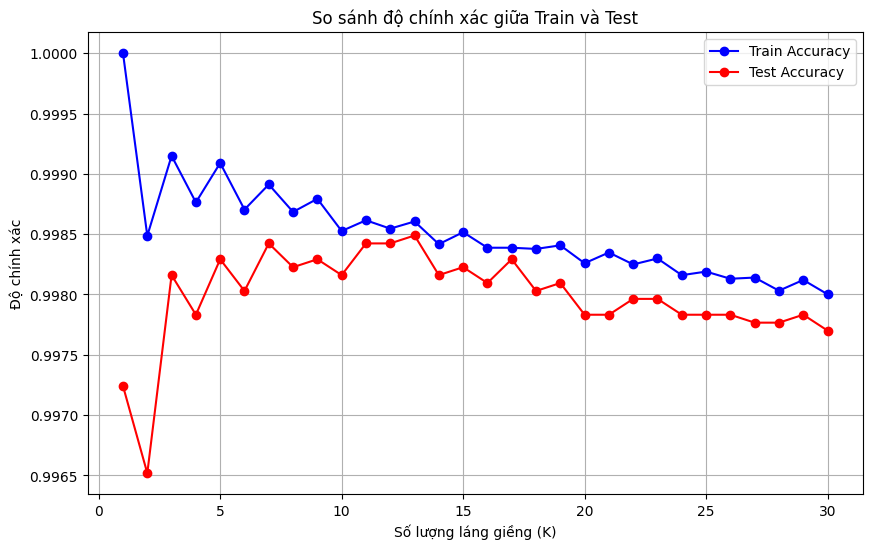

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Train Accuracy', color='blue', marker='o')
plt.plot(k_values, val_scores, label='Test Accuracy', color='red', marker='o')
plt.xlabel('Số lượng láng giềng (K)')
plt.ylabel('Độ chính xác')
plt.legend()
plt.title('So sánh độ chính xác giữa Train và Test')
plt.grid(True)
plt.show()

In [21]:
def classification_report_display(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [22]:
classification_report_display(model_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24390
           1       1.00      0.99      1.00      7962

    accuracy                           1.00     32352
   macro avg       1.00      1.00      1.00     32352
weighted avg       1.00      1.00      1.00     32352



In [24]:
path_model_folder = "D:\\project\\Loan_Default\\model\\"
dump(model_knn,f'{path_model_folder}knn_model.joblib')

['D:\\project\\Loan_Default\\model\\knn_model.joblib']

## Logistic reg model

In [7]:
X_combined = np.vstack((X_train, X_val))
y_combined = np.hstack((y_train, y_val))

In [8]:
logreg = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

In [9]:
grid_search.fit(X_combined, y_combined)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [10]:
results = pd.DataFrame(grid_search.cv_results_)

report = results[['param_C', 'param_penalty', 'mean_test_score', 'rank_test_score']]
report = report.sort_values('rank_test_score')

print("🔥 Báo cáo chi tiết các tham số thử nghiệm:")
print(report)

🔥 Báo cáo chi tiết các tham số thử nghiệm:
   param_C param_penalty  mean_test_score  rank_test_score
0     0.01            l1         1.000000                1
2     0.10            l1         1.000000                1
6    10.00            l1         1.000000                1
4     1.00            l1         1.000000                1
7    10.00            l2         1.000000                1
3     0.10            l2         0.999991                6
5     1.00            l2         0.999991                6
8   100.00            l1         0.999991                6
9   100.00            l2         0.999991                6
1     0.01            l2         0.999759               10


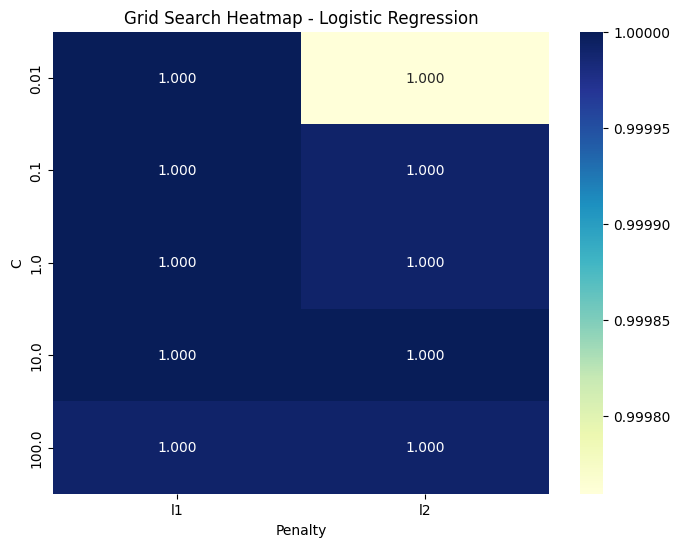

In [11]:
pivot_table = results.pivot_table(
    index='param_C',
    columns='param_penalty',
    values='mean_test_score'
)

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Grid Search Heatmap - Logistic Regression")
plt.xlabel("Penalty")
plt.ylabel("C")
plt.show()

In [12]:
best_model_log_reg = grid_search.best_estimator_
y_pred_test = best_model_log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("🎯 Test accuracy:", test_accuracy)

🎯 Test accuracy: 1.0


c:\Users\caoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [13]:
print("\n📌 Báo cáo phân loại trên tập test:")
print(classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1']))


📌 Báo cáo phân loại trên tập test:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     24390
     Class 1       1.00      1.00      1.00      7962

    accuracy                           1.00     32352
   macro avg       1.00      1.00      1.00     32352
weighted avg       1.00      1.00      1.00     32352



In [25]:
path_model_folder = "D:\\project\\Loan_Default\\model\\"
dump(best_model_log_reg,f'{path_model_folder}best_model_log_reg.joblib')

['D:\\project\\Loan_Default\\model\\best_model_log_reg.joblib']

## D-tree model

In [20]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1,
                           return_train_score=True)

In [21]:
grid_search.fit(X_combined, y_combined)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [22]:
results_df = pd.DataFrame(grid_search.cv_results_)
print("\n📌 Báo cáo chi tiết từng tổ hợp tham số:")
print(results_df[['params', 'mean_test_score', 'mean_train_score', 'rank_test_score']])


📌 Báo cáo chi tiết từng tổ hợp tham số:
                                               params  mean_test_score  \
0   {'criterion': 'gini', 'max_depth': 3, 'min_sam...              1.0   
1   {'criterion': 'gini', 'max_depth': 3, 'min_sam...              1.0   
2   {'criterion': 'gini', 'max_depth': 3, 'min_sam...              1.0   
3   {'criterion': 'gini', 'max_depth': 3, 'min_sam...              1.0   
4   {'criterion': 'gini', 'max_depth': 3, 'min_sam...              1.0   
..                                                ...              ...   
67  {'criterion': 'entropy', 'max_depth': None, 'm...              1.0   
68  {'criterion': 'entropy', 'max_depth': None, 'm...              1.0   
69  {'criterion': 'entropy', 'max_depth': None, 'm...              1.0   
70  {'criterion': 'entropy', 'max_depth': None, 'm...              1.0   
71  {'criterion': 'entropy', 'max_depth': None, 'm...              1.0   

    mean_train_score  rank_test_score  
0                1.0          

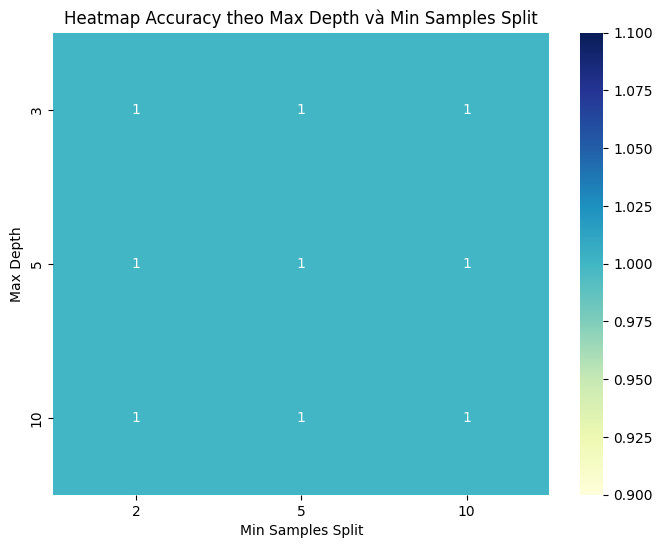

In [24]:
pivot_df = results_df.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_min_samples_split'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')
plt.title('Heatmap Accuracy theo Max Depth và Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.show()

In [16]:
best_model_dtree = grid_search.best_estimator_
print("🌟 Best parameters:", grid_search.best_params_)

🌟 Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


c:\Users\caoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(



📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24390
           1       1.00      1.00      1.00      7962

    accuracy                           1.00     32352
   macro avg       1.00      1.00      1.00     32352
weighted avg       1.00      1.00      1.00     32352



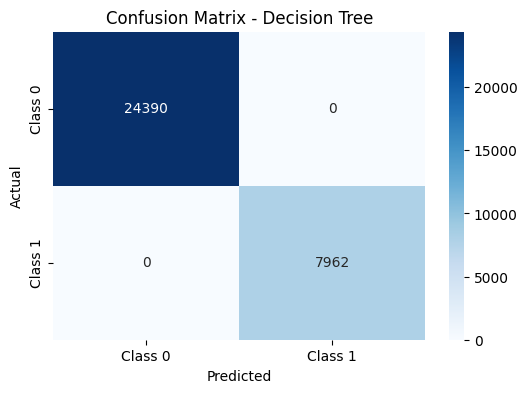

In [17]:
y_pred_test = best_model_dtree.predict(X_test)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_test))

# 🔥 5. Vẽ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

c:\Users\caoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\caoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


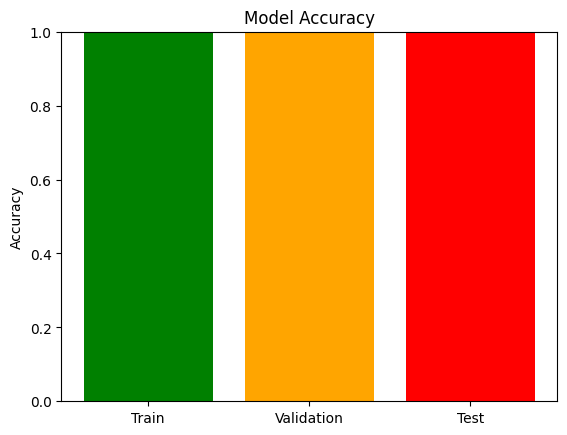

In [18]:
train_acc = accuracy_score(y_train, best_model_dtree.predict(X_train))
val_acc = accuracy_score(y_val, best_model_dtree.predict(X_val))
test_acc = accuracy_score(y_test, y_pred_test)

plt.bar(['Train', 'Validation', 'Test'], [train_acc, val_acc, test_acc], color=['green', 'orange', 'red'])
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()

In [26]:
path_model_folder = "D:\\project\\Loan_Default\\model\\"
dump(best_model_dtree,f'{path_model_folder}best_model_dtree.joblib')

['D:\\project\\Loan_Default\\model\\best_model_dtree.joblib']

## SVM model

In [8]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [9]:
svm_model = SVC()
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    verbose=1
)

In [10]:
grid_search.fit(X_combined, y_combined)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [11]:
path_model_folder = "D:\\project\\Loan_Default\\model\\"
dump(grid_search.best_estimator_,f'{path_model_folder}best_model_svm.joblib')

['D:\\project\\Loan_Default\\model\\best_model_svm.joblib']

In [12]:
results_df = pd.DataFrame(grid_search.cv_results_)

In [13]:
print("🌟 Best Parameters:", grid_search.best_params_)
print("🎯 Best Cross-Validation Accuracy:", grid_search.best_score_)

🌟 Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
🎯 Best Cross-Validation Accuracy: 1.0


In [14]:
y_pred = grid_search.best_estimator_.predict(X_test)
print("\n📌 Báo cáo chi tiết với mô hình tốt nhất:")
print(classification_report(y_test, y_pred))

c:\Users\caoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(



📌 Báo cáo chi tiết với mô hình tốt nhất:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24390
           1       1.00      1.00      1.00      7962

    accuracy                           1.00     32352
   macro avg       1.00      1.00      1.00     32352
weighted avg       1.00      1.00      1.00     32352



c:\Users\caoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


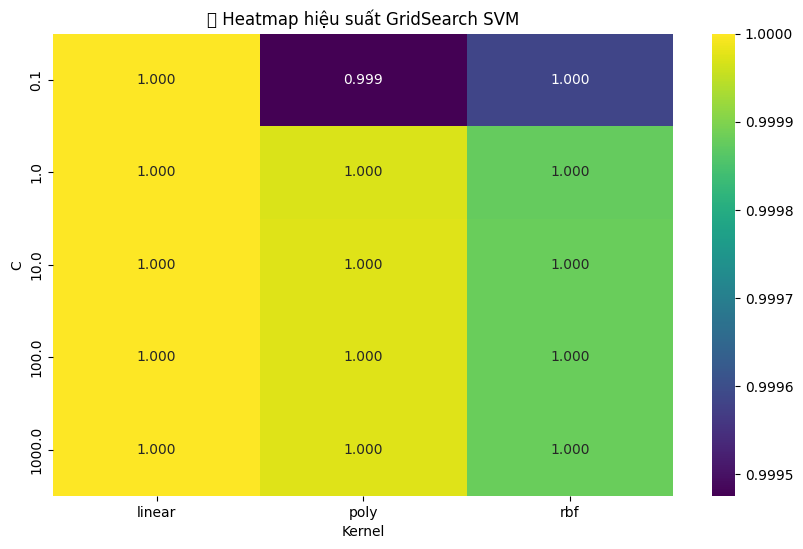

In [15]:
pivot_results = results_df.pivot_table(
    index='param_C',
    columns='param_kernel',
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_results, annot=True, cmap='viridis', fmt='.3f')
plt.title("🔍 Heatmap hiệu suất GridSearch SVM")
plt.xlabel("Kernel")
plt.ylabel("C")
plt.show()

## Random-forget model

In [16]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

In [17]:
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    verbose=1
)

In [18]:
grid_search.fit(X_combined, y_combined)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [19]:
results_df = pd.DataFrame(grid_search.cv_results_)

print("🌟 Best Parameters:", grid_search.best_params_)
print("🎯 Best Cross-Validation Accuracy:", grid_search.best_score_)

🌟 Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
🎯 Best Cross-Validation Accuracy: 1.0


In [20]:
y_pred = grid_search.best_estimator_.predict(X_test)
print("\n📌 Báo cáo chi tiết với mô hình tốt nhất:")
print(classification_report(y_test, y_pred))


📌 Báo cáo chi tiết với mô hình tốt nhất:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24390
           1       1.00      1.00      1.00      7962

    accuracy                           1.00     32352
   macro avg       1.00      1.00      1.00     32352
weighted avg       1.00      1.00      1.00     32352



c:\Users\caoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


c:\Users\caoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


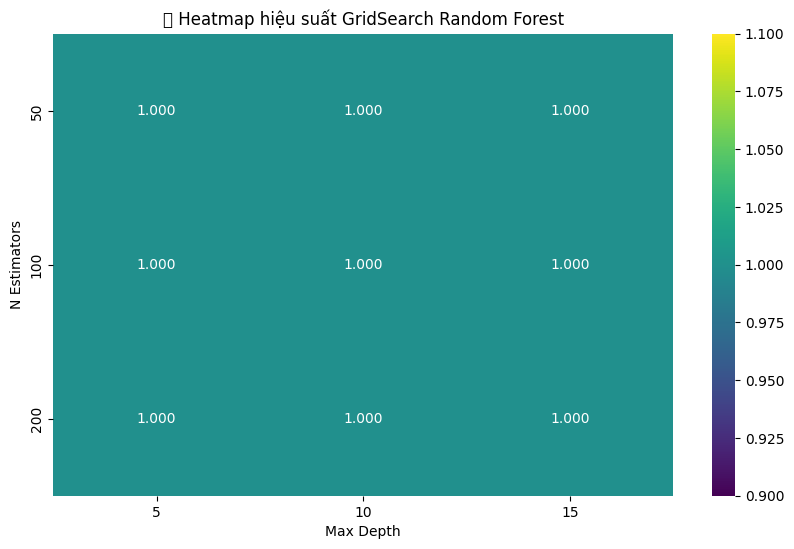

In [21]:
pivot_results = results_df.pivot_table(
    index='param_n_estimators',
    columns='param_max_depth',
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_results, annot=True, cmap='viridis', fmt='.3f')
plt.title("🔥 Heatmap hiệu suất GridSearch Random Forest")
plt.xlabel("Max Depth")
plt.ylabel("N Estimators")
plt.show()

In [22]:
path_model_folder = "D:\\project\\Loan_Default\\model\\"
dump(grid_search.best_estimator_,f'{path_model_folder}best_model_rf.joblib')

['D:\\project\\Loan_Default\\model\\best_model_rf.joblib']

## MLP model

## GRADIENT-BOOSTING model

## ADABOOST model